In [1]:
import numpy as np
import matplotlib.pyplot as plt
import GMM # import Gaussian Mixture Model module you wrote (see GMM.py)

# Two-dimensional Example

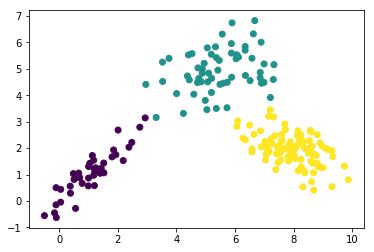

In [5]:
m = 2  # number of dimensions
k = 3  # number of gaussians
sizes = [40,60,100] # number of examples

param_list = list()
param_list.append({'mu': np.array([1,1]), 
                   'sigma': np.array([[1,0.9],[0.9,1]])})
param_list.append({'mu': np.array([5,5]), 
                   'sigma': np.array([[1,0.2],[0.2,1]])})
param_list.append({'mu': np.array([8,2]), 
                   'sigma': np.array([[0.7,-0.3],[-0.3,0.4]])})

data = list()
labels = list()
for i in range(k):
    labels.append(np.repeat(i,sizes[i]))
    data.append(np.random.multivariate_normal(mean = param_list[i]['mu'],
                                              cov = param_list[i]['sigma'],
                                              size = sizes[i]))
data = np.concatenate(data, axis=0)
labels = np.concatenate(labels, axis=0)

plt.figure()
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

Iteration 1
Log-likelihood: -37384.166
Iteration 2
Log-likelihood: -37270.162
Iteration 3
Log-likelihood: -37227.453
Iteration 4
Log-likelihood: -37197.117
Iteration 5
Log-likelihood: -37168.244
Iteration 6
Log-likelihood: -37148.157
Iteration 7
Log-likelihood: -37137.609
Iteration 8
Log-likelihood: -37126.252
Iteration 9
Log-likelihood: -37109.015
Iteration 10
Log-likelihood: -37087.928
Iteration 11
Log-likelihood: -37055.207
Iteration 12
Log-likelihood: -37022.941
Iteration 13
Log-likelihood: -37012.243
Iteration 14
Log-likelihood: -37008.214
Iteration 15
Log-likelihood: -37007.520
Iteration 16
Log-likelihood: -37007.422
Iteration 17
Log-likelihood: -37007.409
Iteration 18
Log-likelihood: -37007.407
Iteration 19
Log-likelihood: -37007.407
Iteration 20
Log-likelihood: -37007.406
Iteration 21
Log-likelihood: -37007.406
Iteration 22
Log-likelihood: -37007.406
Iteration 23
Log-likelihood: -37007.406
Iteration 24
Log-likelihood: -37007.406
Iteration 25
Log-likelihood: -37007.406


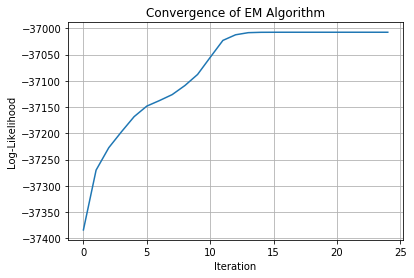

In [6]:
data_GMM = GMM.GMM(data.T)
data_GMM.EM(k=3, verbose=True)

# Compare actual parameters vs. EM algorithm-computed parameters

In [7]:
print('Actual parameters \n========================')
for i,p_dict in enumerate(param_list):
    print('Mean {} \n{}'.format(i, p_dict['mu']))
    print('Covariance {} \n{}'.format(i, p_dict['sigma']))
    print('\n')
    
print('Estimated parameters \n========================')
for i,p_dict in enumerate(data_GMM.params):
    print('Mean {} \n{}'.format(i, np.around(p_dict['mu'],2)))
    print('Covariance {} \n{}'.format(i, np.around(p_dict['sigma'],2)))
    print('\n')
    

Actual parameters 
Mean 0 
[1 1]
Covariance 0 
[[1.  0.9]
 [0.9 1. ]]


Mean 1 
[5 5]
Covariance 1 
[[1.  0.2]
 [0.2 1. ]]


Mean 2 
[8 2]
Covariance 2 
[[ 0.7 -0.3]
 [-0.3  0.4]]


Estimated parameters 
Mean 0 
[1.11 1.09]
Covariance 0 
[[0.77 0.72]
 [0.72 0.81]]


Mean 1 
[7.95 1.93]
Covariance 1 
[[ 0.64 -0.22]
 [-0.22  0.32]]


Mean 2 
[5.5  4.93]
Covariance 2 
[[1.06 0.2 ]
 [0.2  0.64]]




# Multi-dimensional Example

In [8]:
def rand_cov(m):
    '''
    Generate random covariance matrix
    <m>: integer indicating desired dimension
    Note: covariance matrices must be symmetric 
          and positive semi-definite
    '''
    Q = np.linalg.qr(np.random.randint(0,9,(m,m)))[0]
    D = np.diag(np.random.randint(1,9,m))
    return Q.dot(D).dot(Q.T)

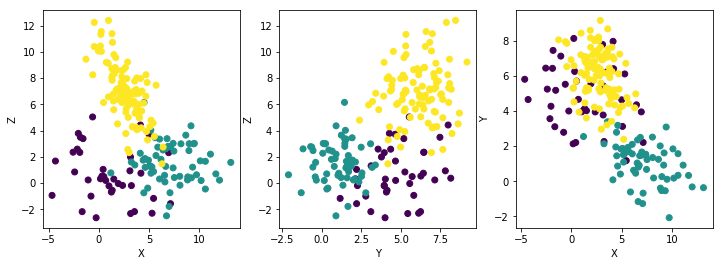

In [9]:
m = 3  # number of dimensions
k = 3  # number of gaussians
sizes = [40,60,100] # number of examples

param_list = list()
param_list.append({'mu': np.array([1,5,1]), 
                   'sigma': rand_cov(m)})
param_list.append({'mu': np.array([7,1,2]), 
                   'sigma': rand_cov(m)})
param_list.append({'mu': np.array([3,6,7]), 
                   'sigma': rand_cov(m)})

data = list()
labels = list()

for j in range(k):
    labels.append(np.repeat(j,sizes[j]))
    data.append(np.random.multivariate_normal(mean = param_list[j]['mu'],
                                              cov = param_list[j]['sigma'],
                                              size = sizes[j]))
data = np.concatenate(data, axis=0)
labels = np.concatenate(labels, axis=0)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(data[:,0], data[:,2], c=labels)
plt.xlabel('X')
plt.ylabel('Z')
plt.subplot(1,3,2)
plt.scatter(data[:,1], data[:,2], c=labels)
plt.xlabel('Y')
plt.ylabel('Z')
plt.subplot(1,3,3)
plt.scatter(data[:,0], data[:,1], c=labels)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Iteration 1
Log-likelihood: -37714.294
Iteration 2
Log-likelihood: -37602.210
Iteration 3
Log-likelihood: -37560.494
Iteration 4
Log-likelihood: -37541.738
Iteration 5
Log-likelihood: -37534.601
Iteration 6
Log-likelihood: -37531.648
Iteration 7
Log-likelihood: -37530.277
Iteration 8
Log-likelihood: -37529.477
Iteration 9
Log-likelihood: -37528.935
Iteration 10
Log-likelihood: -37528.532
Iteration 11
Log-likelihood: -37528.207
Iteration 12
Log-likelihood: -37527.915
Iteration 13
Log-likelihood: -37527.627
Iteration 14
Log-likelihood: -37527.323
Iteration 15
Log-likelihood: -37526.994
Iteration 16
Log-likelihood: -37526.634
Iteration 17
Log-likelihood: -37526.239
Iteration 18
Log-likelihood: -37525.802
Iteration 19
Log-likelihood: -37525.316
Iteration 20
Log-likelihood: -37524.767
Iteration 21
Log-likelihood: -37524.143
Iteration 22
Log-likelihood: -37523.439
Iteration 23
Log-likelihood: -37522.685
Iteration 24
Log-likelihood: -37521.961
Iteration 25
Log-likelihood: -37521.363
Iteration

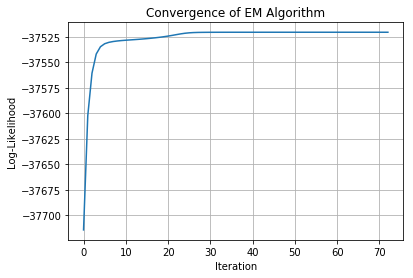

In [10]:
multidim_data = GMM.GMM(data.T)
multidim_data.EM(3, verbose=True)


In [11]:
print('Actual parameters \n========================')
for i,p_dict in enumerate(param_list):
    print('Mean {} \n{}'.format(i, np.around(p_dict['mu'],2)))
    print('Covariance {} \n{}'.format(i, np.around(p_dict['sigma'],2)))
    print('\n')
    
print('Estimated parameters \n========================')
for i,p_dict in enumerate(multidim_data.params):
    print('Mean {} \n{}'.format(i, np.around(p_dict['mu'],2)))
    print('Covariance {} \n{}'.format(i, np.around(p_dict['sigma'],2)))
    print('\n')
    

Actual parameters 
Mean 0 
[1 5 1]
Covariance 0 
[[ 6.97  0.16 -1.05]
 [ 0.16  5.42 -0.74]
 [-1.05 -0.74  6.61]]


Mean 1 
[7 1 2]
Covariance 1 
[[ 4.78 -0.89 -0.22]
 [-0.89  1.27 -0.18]
 [-0.22 -0.18  1.95]]


Mean 2 
[3 6 7]
Covariance 2 
[[ 2.84 -1.24 -2.44]
 [-1.24  2.38  1.1 ]
 [-2.44  1.1   4.79]]


Estimated parameters 
Mean 0 
[6.92 1.27 1.4 ]
Covariance 0 
[[ 6.34 -1.59  0.17]
 [-1.59  1.63 -0.08]
 [ 0.17 -0.08  2.23]]


Mean 1 
[2.78 6.04 6.91]
Covariance 1 
[[ 2.67 -0.83 -2.61]
 [-0.83  2.18  0.62]
 [-2.61  0.62  4.79]]


Mean 2 
[0.25 5.3  0.65]
Covariance 2 
[[ 5.86  0.63 -1.61]
 [ 0.63  2.42  0.75]
 [-1.61  0.75  3.81]]


